In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from skimage.io import imshow

Figure(648x288)


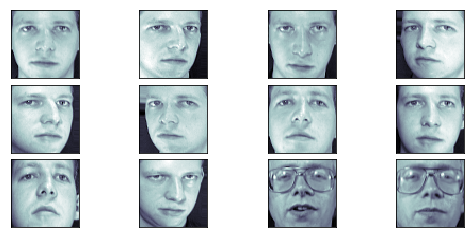

In [6]:
face_images = np.load("./data/olivetti_faces.npy")
flg, axes = plt.subplots(3, 4, figsize = (9, 4), 
                        subplot_kw = {"xticks":[], "yticks":[]},   #??
                        gridspec_kw=dict(hspace=0.1, wspace=0.1)) #??
print(flg)
for i, ax in enumerate(axes.flat):
    ax.imshow(face_images[i], cmap="bone")

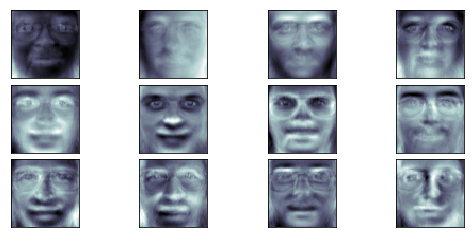

In [8]:
# rewrite PCA algorithm
n_components = 150
# 400 * 64 * 64 -> 400 *150
def face_pca(faces, n_components):
    # convert 400*64*64 ->400*4096 
    faces_data = faces.reshape(faces.shape[0], faces.shape[1]*faces.shape[2])
    pca = PCA(n_components=n_components).fit(faces_data)
    faces_pca = pca.transform(faces_data)
    eigen_faces = pca.components_.reshape((n_components, 64, 64))
    return faces_pca, eigen_faces  # face_pca 400*150 eigen_face 就是u1
#eigen face is derived from the data
#Any human face can be considered to be a combination of these standard faces.
# the entire eigen face set is the u1

faces_pca, eigen_faces = face_pca(face_images, n_components)

fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigen_faces[i], cmap='bone')

In [30]:
class KMeans():
    def __int__(self, k = 40, max_iter=500):
        self.k = k
        self.max_iter = max_iter
        self.label = None # n*1 array
        
    def _dist(self, a, b):
        return np.math.sqrt(sum(np.power(a-b, 2)))
    
    def _randCenter(self, data, k):
        m = data.shape[1]             # get the number of columns
        centers = np.empty((k, m))    # create k emppty points
        
        for i in range(m): # traver over the columns
            minVal = min(data[:, i])
            maxVal = max(data[:, i])
            ceters[:, i] = (minVal + (maxVal - minVal) * np.random.rand(k, 1)).flatten()
            # looks like it is just a random center
        return centers
        # fina a random value for each column, each value is a point
        
    def fit(self, data): # group the 400* 140 matrix
        n = data.shape[0]
        cluster_assign = np.zeros(n)
        cluster_distance = np.full(n, np.inf)
        
        centers = self._randCenter(data, self.k) # get k centers
        
        for _ in range( self.max_inter):
            cluster_changed = False
            for i in range(n):
                min_dis = np.inf
                min_id = -1
                for j in range(k):
                    dis = self._dist(data[i,:], centers[j,:])
                    if (dist < min_dis):
                        min_dis = dis
                        min_id = j
                if cluster_assign[i] != min_id:
                    cluster_assign[i] = min_id
                    cluster_changed = True
            if not cluster_changed:
                break   # no need to recurse any more
            
            # renew cluster centers
            for i in range(self.k):
                index = np.nonzeros(cluster_asssign == i[0])
                centers[i,:] = np.mean(data[index], axis = 0)
        self.labels = cluster_assign

In [32]:
# Clustering
cluster_num = 40
cluster = KMeans(k=cluster_num)
cluster.fit(faces_pca)

# Show the final results
# Show the final results
labels = cluster.labels
for i in range(cluster_num):
    index = np.nonzero(labels==i)[0]
    num = len(index)
    this_faces = faces_image[index]
    fig, axes = plt.subplots(1, num, figsize=(4 * num, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_faces[i], cmap='bone')

TypeError: object() takes no parameters

# ways to improve
1. n_components = 150 can be improved to reduce information loss
2. random picked the centers: k means can do multiple times to see which one is better
or pick the ones dist the fartherest


face_image - face_pca*eigen_faces (还原回去的结果） /|face_image| < 0.01
k is in the * statement above
face_pca is 400* 150
face_image 400* 4096
eigen_faces 150 * 4096 